# Tensorisation Exercises

Steps to consider:
Normalisation is important before tensorisation

Naively Constructing a tensor from a matrix data, by iterating through all values from minimum to maximum in every column as a dimension index in the tensor, will create a large tensor

Constructing the Tensor from the PCA first three principal components as done in this notebook, will not relate back to the original variables and their meaning, but principal components indicate the principal modes of variation.

Constructing the Tensor from the SVD highest rank components, will relate back to the original variables and their meaning, capturing the highest ranks components only. However, this is not suitable as the reconstructed matrix is of the same size, and only sparsed (higher rank values are zeroed out), reconstructing a smaller size, will give the PCA

Sampling and other means are also possible. This can be done by taking every mode min and max, and divide by the quantisation factor, and select from every range the required samples.


Understanding the DataSet: https://www.kaggle.com/code/hamedetezadi/heart-attack-risk-prediction
Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type, categorical columns, can be broken down in different dimensions (here 4) to capture the interactions with other dimensions
     Value 0: typical angina
     Value 1: atypical angina
     Value 2: non-anginal pain
     Value 3: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
     Value 0: normal
     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

In [119]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

userdata = pd.read_csv('heart.csv')
userdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [120]:
print(userdata.shape)

(303, 14)


In [121]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','ca'] # such that these will be x
df=userdata[columns].copy()
target = userdata["target"] # this will be y
df = df.join(target) 
df.corr(method ='kendall') 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
age,1.000000,-0.082272,-0.071577,0.201071,0.135062,0.094595,-0.109349,-0.280009,0.273255,-0.197857
sex,-0.082272,1.000000,-0.057955,-0.044438,-0.124104,0.045032,-0.048085,-0.032817,0.112199,-0.280937
cp,-0.071577,-0.057955,1.000000,0.027548,-0.069899,0.083862,0.060839,0.246160,-0.189400,0.430506
trestbps,0.201071,-0.044438,0.027548,1.000000,0.086474,0.127574,-0.105147,-0.027760,0.070387,-0.102064
chol,0.135062,-0.124104,-0.069899,0.086474,1.000000,0.015140,-0.132664,-0.031437,0.088549,-0.099131
fbs,0.094595,0.045032,0.083862,0.127574,0.015140,1.000000,-0.080996,-0.011749,0.126434,-0.028046
restecg,-0.109349,-0.048085,0.060839,-0.105147,-0.132664,-0.080996,1.000000,0.072481,-0.091541,0.147678
thalach,-0.280009,-0.032817,0.246160,-0.027760,-0.031437,-0.011749,0.072481,1.000000,-0.198407,0.352609
ca,0.273255,0.112199,-0.189400,0.070387,0.088549,0.126434,-0.091541,-0.198407,1.000000,-0.430124
target,-0.197857,-0.280937,0.430506,-0.102064,-0.099131,-0.028046,0.147678,0.352609,-0.430124,1.000000


In [122]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,0,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,0,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,2,0
301,57,1,0,130,131,0,1,115,1,0


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdf = df.copy()
sdf = sdf.drop(["target"], axis=1) # remove the target because it should not be standardised
sdf = scaler.fit_transform(sdf)

sdf = pd.DataFrame(sdf, columns=columns).join(target) # add it now
sdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.714429,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.714429,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.714429,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.714429,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,-0.714429,1
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,-0.714429,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.714429,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,1.244593,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,0.265082,0


In [124]:
df.shape

(303, 10)

In [125]:
import math
import numpy as np # linear algebra
import tensorly  as tl

#convert matrix Data Frame values to positive integer values to be used as indices in the tensor to be created, 

# dynamic indexing for any number of components as initial columns of the input matrix, to control which components, reorder the input matrix such that the 

# first number of columns (parameterised by components) will be the modes of the tensor, and the index of the each mode is the positive integer value of these variables

# this is unfolds a matrix n x m to a tensor i1, ..., im, where ij is the range of values from min to max of columns j
# and the count of non-zero values in the tensor is n

# the target value can be parameterised

# if this is a prelabelled dataset, and the Target variable is the labelled class, then the tensor itself will contain the target values of the given indices, 
# such that no regression or classification required, can be used for factorisation and tensor completion problems


# otherwise, arrange the input dataframe, such as the modes of the tensor are in the order required for the number selected in the components parameter, then
# the variable/column in then dataset to be used as the tensor values for a given index, be in the tart parameter

# the tensor values are the result of the function f(x_1, ..., x_n), where n is the number of components

def tensorisation_Targets (Df, components, target="target"):
    if components >= Df.shape[1]:
        print ("Number of components must be less or equal to number of the columns in the input matrix. Exiting without creating the tensor")
        return
    minVals = []
    maxVals = []
    tensorShape = []
    for i in range(components):
        minVal = Df.iloc[:,i].min()
        # this will be an index, therefore starting from zero is necessary
        if minVal > 0:
            Df.iloc[:,i] += minVal
            minVal = 0
        if minVal < 0:
            Df.iloc[:,i] -= minVal
            minVal = 0
        minVals.append(minVal)
        # also the max value need to be positive non-zero, because it will be the tensor shape 
        maxVal = Df.iloc[:,i].max()
        if maxVal <= 0:
            Df.iloc[:,i] -= maxVal + 1
            maxVal = 1
        maxVals.append(maxVal)
        print("mode  " + str(i) + " max value =" + str(maxVal) + ", min value = " + str(minVal))
        tensorShape.append(int(maxVal)+1)

    # update the values in the array, to be used as indices
    for k,j in Df.iterrows():
            for i in range(components):
                j[i] = int(math.floor(j[i])) + abs(int(minVals[i])) + 1
    print (tensorShape)
    tensorShape = tuple(tensorShape) 
    tensor_array = np.zeros(tensorShape)
    count = 0
    for k,j in Df.iterrows():
        count = count + 1
        t_index = tuple(
            int(j[i]) for i in range(components)
        )
        tensor_array[t_index] = j[target]

    unique,counts = np.unique(tensor_array,return_counts=True)
    print("Unique Counts: " + str(dict(zip(unique,counts))))
    print("Count: " + str(count))
    return tensor_array

In [126]:
print ("data shape" + str(sdf.shape))

tensor_array = tensorisation_Targets (sdf, 8)
tensor2 = tl.tensor(tensor_array)
tensor2.shape

data shape(303, 10)
mode  0 max value =5.293863674779381, min value = 0
mode  1 max value =2.14942274016584, min value = 0
mode  2 max value =2.9116375505796483, min value = 0
mode  3 max value =6.05396778775372, min value = 0
mode  4 max value =8.464561247709664, min value = 0
mode  5 max value =2.8120725342680077, min value = 0
mode  6 max value =3.809588216262976, min value = 0
mode  7 max value =5.728696144636959, min value = 0
[6, 3, 3, 7, 9, 3, 4, 6]
Unique Counts: {0.0: 244795, 1.0: 149}
Count: 303


(6, 3, 3, 7, 9, 3, 4, 6)

In [127]:
tensor_array

array([[[[[[[[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],

            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],

            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]]],


           [[[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],

            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],

            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]]],


           [[[0., 0., 0., 0., 0., 0.],
         

In [128]:
# example building a tensor of the first three variables as modes: 'age','sex','cp',, and the tensor values from the fourth variable 'trestbps',

tensor_array = tensorisation_Targets (sdf, 3, "trestbps")
tensor2 = tl.tensor(tensor_array)
tensor2.shape

mode  0 max value =5.293863674779381, min value = 0.0
mode  1 max value =2.14942274016584, min value = 0.0
mode  2 max value =2.9116375505796483, min value = 0.0
[6, 3, 3]
Unique Counts: {0.0: 25, 0.7995806512127555: 1, 0.9138064585288634: 1, 1.370709687793295: 2, 1.484935495109403: 5, 1.770500013399673: 1, 1.8276129170577269: 2, 1.9418387243738346: 2, 2.056064531689943: 3, 2.1702903390060504: 1, 2.2845161463221584: 1, 2.5129677609543744: 2, 2.6271935682704823: 2, 2.8556451829026983: 1, 2.969870990218806: 1, 3.198322604851022: 1, 3.31254841216713: 1, 3.7694516414315613: 1, 4.797483907276533: 1}
Count: 303


(6, 3, 3)

In [129]:
tensor_array

array([[[1.37070969, 1.4849355 , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.82761292, 2.51296776, 1.4849355 ]],

       [[2.17029034, 2.51296776, 0.        ],
        [0.        , 0.        , 0.        ],
        [1.4849355 , 0.79958065, 0.91380646]],

       [[1.94183872, 1.4849355 , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.94183872, 1.37070969, 1.4849355 ]],

       [[2.05606453, 2.05606453, 3.1983226 ],
        [0.        , 0.        , 0.        ],
        [2.05606453, 1.82761292, 2.28451615]],

       [[4.79748391, 2.96987099, 2.62719357],
        [0.        , 0.        , 0.        ],
        [2.85564518, 3.31254841, 3.76945164]],

       [[0.        , 2.62719357, 0.        ],
        [0.        , 0.        , 0.        ],
        [1.77050001, 0.        , 0.        ]]])

In [130]:
# folding or reshaping a matrix to a tensor, this is unfolds a matrix 3 x 6 to a tensor 3 x 3 x 3, or other shapes as parameterised
def tensorisation_unfolding (Df, tensorShape):

    tensorShape = tuple(tensorShape) 
    tensor_array = Df.to_numpy().reshape(tensorShape)
    
    return tensor_array

In [131]:

print ("data shape" + str(sdf.shape))
# there are many ways the tensor shape can be chosen such that the total shape values when multiplied will be equal to the input matrix number of elements
# it can be done by hand, like here, if we keep the first mode equal 303 entites, but tensorise the columns, as 5x2 instead of 10, 
# we can automate this as dividing by 2 in the second mode, then dividing the 2nd mode shape by the new mode
mode1 = sdf.shape[0]
mode2 =  int(sdf.shape[1]/2)
mode3 =  int(sdf.shape[1]/mode2)
tensor_array = tensorisation_unfolding (sdf, (mode1,mode2, mode3 ))
print ("tensor shape" + str(tensor_array.shape))
tensor2 = tl.tensor(tensor_array)
tensor2.shape

data shape(303, 10)
tensor shape(303, 5, 2)


(303, 5, 2)

In [132]:
# we can also factorise the columns in different ways
def getFactors (number):
    factors = []
    for i in range(1, number + 1):
        if number % i == 0:
            factors.append(i)
    return factors

factors=getFactors (sdf.shape[1])
print(factors)

mode1 = sdf.shape[0]
for i in factors :
    if (i >= 2) and (i < sdf.shape[1]):
        mode2 =  int(sdf.shape[1]/i)
        mode3 =  int(sdf.shape[1]/mode2)
        tensor_array = tensorisation_unfolding (sdf, (mode1,mode2, mode3 ))
        print ("tensor shape" + str(tensor_array.shape))


[1, 2, 5, 10]
tensor shape(303, 5, 2)
tensor shape(303, 2, 5)


# PCA


In [133]:
# to identify the contribution of all features onto three latent fitness factors, we can do PCA to identify the most significant components
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(sdf)
principalDf = pd.DataFrame(principalComponents)
target = userdata["target"]
principalDf = principalDf.join(target)




In [134]:
# example building a tensor of the first three principal components as modes:  and accepting the default target name,

tensor_array = tensorisation_Targets (principalDf, 3)
tensor2 = tl.tensor(tensor_array)
tensor2.shape

mode  0 max value =6.980856030682846, min value = 0
mode  1 max value =6.164257661413757, min value = 0
mode  2 max value =6.620392362119945, min value = 0
[7, 7, 7]
Unique Counts: {0.0: 297, 1.0: 46}
Count: 303


(7, 7, 7)

In [135]:
tensor_array

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0.],
        [0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 0., 0.],
      

## Other tensorisation methods: Debals, O., 2017. Tensorization and Applications in Blind Source Separation.

# Tensorisation of single vectors:

## -  Hankelisation: An exponential can be mapped to a rank-1 Hankel matrix and, more generally, a rank-1 Hankel tensor, and their applications in segmentation for signal compression or BSS. For example, an exponential vector can be rearranged as follows: 

$ [1, z, z^2, z^3, z^4] ≈   \begin{bmatrix}  1 &  z& z^2\\ z& z^2& z^3\\ z^2& z^3& z^4 \end{bmatrix}  =  \begin{bmatrix}  1 &  z& z^2 \end{bmatrix} \begin{bmatrix}  1 \\ z \\ z^2 \end{bmatrix}   $

## - Segmentation

## -  Löwnerization, and their applications in BSS

## - the collection of monomial relations

## -  time–frequency with segmentation 

## -  time–scale transforms.


## -  mapping a vector of length N to a tensor of size N × N × N, causing dimensionality curse, but to investigate some properties for a small N, it could be useful


# Tensorisation of a set of vectors:

## -  Directly to a tensor using 

### - higher-order statistics such as The fourth-order cumulant, which is a fourth-order tensor, of a set of mutually statistically independent signals, which is approximately diagonal. Also mixed discriminants 

### - Adjacency tensors

### - Score functions

## - Using collection of matrices using 

### - the stacking of Hessian matrices

### -  the stacking of Jacobian matrices

### -  Covariance matrices

### -  Piecewise outer product


## Creating these tensorization methods are left as exercise

#  SDV 

In [136]:
print(df.shape)
u, s, vh = np.linalg.svd(df, full_matrices=False)
u.shape, s.shape, vh.shape

(303, 10)


((303, 10), (10,), (10, 10))

In [149]:
# reconstruct from SVD, using full rank
np.allclose(df, np.dot(u * s, vh))
smat = np.diag(s)
reconstructed= np.dot(u, np.dot(smat, vh))
print("all close: "+ str(np.allclose(df, reconstructed)))
sdf = pd.DataFrame(reconstructed, columns=columns+["target"])
sdf

all close: True


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
0,63.0,1.000000e+00,3.000000e+00,145.0,233.0,1.000000e+00,8.904370e-15,150.0,-6.606470e-15,1.000000e+00
1,37.0,1.000000e+00,2.000000e+00,130.0,250.0,5.048120e-16,1.000000e+00,187.0,4.042621e-14,1.000000e+00
2,41.0,6.064184e-14,1.000000e+00,130.0,204.0,5.512969e-16,-1.529269e-16,172.0,2.505136e-14,1.000000e+00
3,56.0,1.000000e+00,1.000000e+00,120.0,236.0,-3.274687e-16,1.000000e+00,178.0,-2.158597e-14,1.000000e+00
4,57.0,9.321569e-14,6.527683e-15,120.0,354.0,4.364290e-17,1.000000e+00,163.0,-2.468201e-15,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...
298,57.0,3.416696e-14,9.980620e-16,140.0,241.0,-3.500414e-17,1.000000e+00,123.0,4.420817e-15,3.038723e-16
299,45.0,1.000000e+00,3.000000e+00,110.0,264.0,-1.435774e-16,1.000000e+00,132.0,7.644711e-15,-1.641090e-15
300,68.0,1.000000e+00,2.610716e-14,144.0,193.0,1.000000e+00,1.000000e+00,141.0,2.000000e+00,1.138375e-14
301,57.0,1.000000e+00,1.857160e-14,130.0,131.0,-4.302798e-16,1.000000e+00,115.0,1.000000e+00,7.837239e-15


In [150]:
from sklearn.metrics import mean_squared_error

fullSVDReconError = mean_squared_error(df, reconstructed)
fullSVDReconError

1.8442642377061753e-27

In [151]:
# Now compress, out of the highest 9 ranks, choose 5 for compression, this will include sparsity as more terms will be multiplied by zero
n = 5
S = np.zeros(np.shape(s))
for i in range(0, n):
     S[i] = s[i]
S.shape

(10,)

In [152]:
smat = np.diag(S)
reconstructed = u @ smat @ vh

from sklearn.metrics import mean_squared_error

lowSVDReconError = mean_squared_error(df, reconstructed)
lowSVDReconError

0.1584857225868721

In [153]:

#creating a dataframe from the SVD reconstructed sparser lower rank matrix, that can then be sent to the tensorisation function to create the tensor and experiment with it

sdf = pd.DataFrame(reconstructed, columns=columns+["target"])
print (sdf.shape)

# example building a tensor of the first three principal components as modes:  and accepting the default target name,

# Constructing the tensor of 9 modes for the low rank but full size SVD, required 239. GiB, that could not be allocated
#tensor_array = tensorisation_Targets (sdf, 9)
#X = tensorly.tensor(tensor_array)
#X.shape

sdf

(303, 10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
0,63.010722,0.566015,2.509872,145.003780,232.998803,0.191538,0.615485,150.000857,-0.449016,0.976185
1,37.008097,0.646001,1.737866,130.001309,249.998755,0.096995,0.611956,187.003639,-0.242164,1.014397
2,40.989445,0.717762,1.352798,129.996567,204.002023,0.129284,0.599628,171.995354,0.233944,0.803387
3,55.991786,0.715452,1.431850,119.999158,236.000160,0.109478,0.646562,178.001317,0.446286,0.876058
4,56.982656,0.562844,0.875290,119.995465,354.001738,0.083162,0.480258,162.998772,0.714226,0.629996
...,...,...,...,...,...,...,...,...,...,...
298,56.979915,0.630651,0.809420,139.997218,241.002057,0.194985,0.437125,122.994589,0.869713,0.320060
299,45.020089,0.345631,2.055990,110.006135,263.997389,0.098574,0.451356,132.002349,-0.635102,0.895299
300,68.002011,0.926752,0.002794,144.002243,192.999311,0.221075,0.547776,141.000485,2.038664,0.118141
301,56.992406,0.788380,0.354184,129.999757,131.000135,0.217516,0.486519,115.000211,1.443958,0.158889


In [154]:
# We can reconstruct a lower size SVD, we can reconstruct as:
n = 5
S = np.zeros(n)
U = np.zeros([u.shape[0], n])
print (u.shape)
print (U.shape)

for i in range(0, n):
     S[i] = s[i]
     U[:,i] = u[:,i]   
      
smat = np.diag(S)
reconstructed = U @ smat 
reconstructed.shape

(303, 10)
(303, 5)


(303, 5)

This reconstructed matrix has only 5 columns, but the same number of rows as the original data. Matrix V is used only to map the data from this reduced 5-dimensional space to the original 9-dimensional space. to reduce the dataset, just leave V out, but then, the reconstructed matrix will contain the principal components, eigenvectors projections of the data, and are not mappable to the original column names. Also the MSE can not be calculated for two different data shapes, so will keep using the SVD lowSVDReconError MSE in the comparison, and will construct the tensor from the reduced shape. So, I will be using the PCA for smaller values

In [155]:
# creating 5-way tensor, from PCA values, starting from the original dataset in df, scaling in sdf, PCA in principalDf, then tensorising

sdf = df.copy()
sdf = sdf.drop(["target"], axis=1) # remove the target because it should not be standardised
sdf = scaler.fit_transform(sdf)
sdf = pd.DataFrame(sdf, columns=columns).join(target) # add it now

n_components=5
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(sdf)
principalDf = pd.DataFrame(principalComponents)
principalDf = principalDf.join(target)

tensor_array = tensorisation_Targets (principalDf, n_components)
X = tl.tensor(tensor_array)
X.shape

mode  0 max value =6.980856030682845, min value = 0
mode  1 max value =6.164257661413757, min value = 0
mode  2 max value =6.6203923621199525, min value = 0
mode  3 max value =6.41192935959552, min value = 0
mode  4 max value =5.20963731683085, min value = 0
[7, 7, 7, 7, 6]
Unique Counts: {0.0: 14283, 1.0: 123}
Count: 303


(7, 7, 7, 7, 6)

# Compare Matrix Factorisation (SVD) and Tensor Factorisation Techniques & Reconstruction Errors

In [156]:
from tensorly.decomposition import non_negative_parafac
from tensorly.decomposition import non_negative_tucker
from tensorly.decomposition import parafac
from tensorly.decomposition import tucker 
from tensorly.metrics import regression
from tensorflow.keras import losses       

# Non Negative Parafac Decomposition
rank = n_components
factors = non_negative_parafac(X,rank = rank, verbose = 2)
print(factors)
print(len(factors))
regeneratedNNCP_tensor = tl.kruskal_to_tensor(factors)
print(regeneratedNNCP_tensor.shape)
NNCP_RMSE = regression.RMSE(X, regeneratedNNCP_tensor, axis=None)

# Parafac Decomposition
weights, factors = parafac(X, rank=n_components)
regeneratedCP_tensor = tl.cp_to_tensor((weights, factors))
CP_RMSE = regression.RMSE(X, regeneratedCP_tensor, axis=None)

# Non-Negative Tucker
rank = []
for i in range(n_components) :
    rank.append(n_components)
print (rank)
tensor_mu, error_mu = non_negative_tucker(X, rank=rank, tol=1e-12, n_iter_max=100, return_errors=True, verbose = 2)
regeneratedNNTucker_tensor = tl.tucker_to_tensor(tensor_mu)
TuckerNN_RMSE = regression.RMSE(X, regeneratedNNTucker_tensor, axis=None)

# Tucker
core, factors = tucker(X, rank=rank)
print(factors)
print(len(factors))
regeneratedTucker_tensor = tl.tucker_to_tensor((core, factors))
print(regeneratedTucker_tensor.shape)
Tucker_RMSE = regression.RMSE(X, regeneratedTucker_tensor, axis=None)

print("NN CP Root Mean Square error = "+str(NNCP_RMSE))
print("NN CP Mean squared error = " + str(losses.MSE(X,regeneratedNNCP_tensor)))

print("CP Root Mean Square error = "+str(CP_RMSE))
print("CP Mean squared error = " + str(losses.MSE(X,regeneratedCP_tensor)))

print("NN Tucker Root Mean Square error = "+str(TuckerNN_RMSE))
print("NN Tucker Mean squared error = " + str(losses.MSE(X,regeneratedNNTucker_tensor)))

print("Tucker Root Mean Square error = "+str(Tucker_RMSE))
print("Tucker Mean squared error = " + str(losses.MSE(X,regeneratedTucker_tensor)))


Starting iteration 1
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
reconstruction error=0.9247492579356489
Starting iteration 2
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 1, reconstraction error: 0.9031129051102211, decrease = 0.02163635282542775
Starting iteration 3
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 2, reconstraction error: 0.8959065990593544, decrease = 0.007206306050866695
Starting iteration 4
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 3, reconstraction error: 0.8929457708448884, decrease = 0.0029608282144660825
Starting iteration 5
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 4, reconstraction error: 0.8901369672340923, decrease = 0.0028088036107960512
Starting iteration 6
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 5, reconstraction error: 0.8871445750381245, decrease = 0.002992392195967808
Starting iteration 7
Mode 0 of 5
Mode 

Mode 4 of 5
iteration 76, reconstraction error: 0.8664800374898348, decrease = 2.9264356777858325e-05
Starting iteration 78
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 77, reconstraction error: 0.8664540385801077, decrease = 2.5998909727098507e-05
Starting iteration 79
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 78, reconstraction error: 0.8664310730588128, decrease = 2.2965521294882052e-05
Starting iteration 80
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 79, reconstraction error: 0.8664108811713, decrease = 2.019188751278822e-05
Starting iteration 81
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 80, reconstraction error: 0.8663931915088022, decrease = 1.768966249782178e-05
Starting iteration 82
Mode 0 of 5
Mode 1 of 5
Mode 2 of 5
Mode 3 of 5
Mode 4 of 5
iteration 81, reconstraction error: 0.8663777341554132, decrease = 1.5457353389036754e-05
Starting iteration 83
Mode 0 of 5
Mode 1 of

NN CP Mean squared error = tf.Tensor(
[[[[1.55276378e-020 9.44428327e-022 5.71876855e-021 ... 5.47870361e-024
    6.86642603e-023 1.35009745e-134]
   [3.99650600e-007 2.43077121e-008 1.47189761e-007 ... 1.41010965e-010
    1.76728188e-009 3.47488308e-121]
   [4.69381011e-004 2.85488836e-005 1.72871200e-004 ... 1.65614337e-007
    2.07563445e-006 4.08117524e-118]
   ...
   [2.59072647e-004 1.57574224e-005 9.54154475e-005 ... 9.14100566e-008
    1.14563670e-006 2.25258553e-118]
   [4.27884110e-007 2.60249421e-008 1.57588052e-007 ... 1.50972753e-010
    1.89213236e-009 3.72036787e-121]
   [6.07101163e-036 3.69253549e-037 2.23592995e-036 ... 2.14206912e-039
    2.68464224e-038 5.27862477e-150]]

  [[8.21478969e-020 4.99643295e-021 3.02547507e-020 ... 2.89847037e-023
    3.63263535e-022 7.14259748e-134]
   [2.11432395e-006 1.56007034e-004 2.12265933e-003 ... 7.46008788e-010
    9.34968293e-009 1.83836293e-120]
   [2.48322788e-003 1.51035900e-004 1.45098216e-001 ... 8.76171234e-007
    1.098

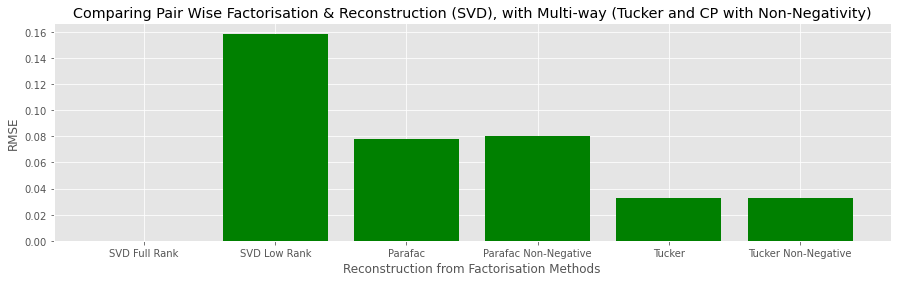

In [157]:
# The results show that low rank SVD is better, because it takes into accout the 9 features, doing PCA of 5 components, is not as good, repeating for 9 PCA components failed to allocate memory
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, axs = plt.subplots(figsize=(15,4))

x = ['SVD Full Rank', 'SVD Low Rank', 'Parafac', 'Parafac Non-Negative', 'Tucker', 'Tucker Non-Negative']
MSE = [fullSVDReconError, lowSVDReconError, CP_RMSE, NNCP_RMSE, Tucker_RMSE, TuckerNN_RMSE]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, MSE, color='green')
plt.xlabel("Reconstruction from Factorisation Methods")
plt.ylabel("RMSE")
plt.title("Comparing Pair Wise Factorisation & Reconstruction (SVD), with Multi-way (Tucker and CP with Non-Negativity)")

plt.xticks(x_pos, x)

plt.show()

# Compare Linear Regression, Polynomial Regression, TuckerRegressor and CPRegressor

In [161]:
from tensorly.regression.tucker_regression import TuckerRegressor
from tensorly.regression import CPRegressor

rank = 1
# Create a tensor Regressor estimator
estimatorTucker = TuckerRegressor(weight_ranks=[rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
estimatorCP = CPRegressor(weight_rank=2, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
# For the regression example, we will create the X tensor, from the dataset, all rows as entities in the first mode, 
# then half the columns in the second mode, and the remaining in the third mode

# Experimenting with other tensorisation techniques is left as an exercise to check the least error

scaler = StandardScaler()


sdf = df.copy()
sdf = sdf.drop(["target"], axis=1) # remove the target because it should not be standardised
sdf = scaler.fit_transform(sdf)
sdf = pd.DataFrame(sdf, columns=columns).join(target) # add it now

mode1 = sdf.shape[0]
mode2 =  int(sdf.shape[1]/2)
mode3 =  int(sdf.shape[1]/mode2)
X = tensorisation_unfolding (sdf, (mode1,mode2, mode3 ))

print (" X Shape" + str(X.shape))
y = sdf["target"]
# Fit the estimator to the data
y_t = tl.tensor(y)
print (" Y Shape" + str(y_t.shape))
estimatorTucker.fit(X, y_t)
estimatorCP.fit(X, y_t)

# will create the normal regression and compare, 

from sklearn.linear_model import LinearRegression


x = sdf.drop(["target"], axis=1)
estimatorLR = LinearRegression().fit(x, y)

# polynomial regression 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
estimatorPoly = LinearRegression().fit(x_poly, y)

# polynomial regression 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
x3_poly = poly.fit_transform(x)
estimatorPoly3 = LinearRegression().fit(x3_poly, y)


# both LR and polynomial with regularisation
from sklearn import linear_model
estimatorLR_Reg = linear_model.Ridge(alpha=.5)

estimatorLR_Reg = estimatorLR_Reg.fit(x, y)

estimatorPoly2_Reg = linear_model.Ridge(alpha=.5)

estimatorPoly2_Reg = estimatorPoly2_Reg.fit(x_poly, y)

estimatorPoly3_Reg = linear_model.Ridge(alpha=.5)

estimatorPoly3_Reg = estimatorPoly3_Reg.fit(x3_poly, y)

 X Shape(303, 5, 2)
 Y Shape(303,)


In [162]:
Y_p = estimatorTucker.predict (X)
T_MSE = regression.RMSE(Y_p, y_t, axis=None)
print("Tucker Root Mean Square error = "+str(T_MSE))

Y_p = estimatorCP.predict (X)
CP_MSE = regression.RMSE(Y_p, y_t, axis=None)
print("CP Root Mean Square error = "+str(CP_MSE))

y_p =estimatorLR.predict (x)
LR_MSE =regression.RMSE(y_p, y, axis=None)
print("LR Root Mean Square error = "+str(LR_MSE))
y_p =estimatorPoly.predict (x_poly)

y_p = estimatorLR_Reg.predict (x)
LRReg_MSE = regression.RMSE(y_p, y, axis=None)
print("LR Regularised Root Mean Square error = "+str(LRReg_MSE))

y_p =estimatorPoly.predict (x_poly)
Poly_MSE = regression.RMSE(y_p, y, axis=None)
print("Polynomial 2 Root Mean Square error = "+str(Poly_MSE))

y_p =estimatorPoly3.predict (x3_poly)
Poly3_MSE = regression.RMSE(y_p, y, axis=None)
print("Polynomial 3 Root Mean Square error = "+str(Poly3_MSE))

y_p = estimatorPoly2_Reg.predict (x_poly)
Poly2Reg_MSE = regression.RMSE(y_p, y, axis=None)
print("Polynomial 2 Regularised Root Mean Square error = "+str(Poly2Reg_MSE))

y_p = estimatorPoly3_Reg.predict (x3_poly)
Poly3Reg_MSE = regression.RMSE(y_p, y, axis=None)
print("Polynomial 3 Regularised Root Mean Square error = "+str(Poly3Reg_MSE))

Tucker Root Mean Square error = 0.00489939677258568
CP Root Mean Square error = 0.0046752516211273545
LR Root Mean Square error = 0.375241868382188
LR Regularised Root Mean Square error = 0.37524207878899646
Polynomial 2 Root Mean Square error = 0.3285546832522133
Polynomial 3 Root Mean Square error = 0.26814781922609504
Polynomial 2 Regularised Root Mean Square error = 0.3285561070823613
Polynomial 3 Regularised Root Mean Square error = 0.21220982379730294


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['LR', 'LR_Reg', 'Poly 2', 'Poly 2 Reg', 'Poly 3', 'Poly 3 Reg', 'CP', 'Tucker']
MSE = [LR_MSE, LRReg_MSE, Poly_MSE, Poly2Reg_MSE, Poly3_MSE, Poly3Reg_MSE, CP_MSE, T_MSE]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, MSE, color='green')
plt.xlabel("Regression Methods")
plt.ylabel("RMSE")
plt.title("Comparing Pair Wise Regression (Linear, Polynomial, with and without Regularisation), with Multi-way Regression (Tucker and CP)")

plt.xticks(x_pos, x)

plt.show()

NameError: name 'LR_MSE' is not defined